In [53]:
# Importing thelibraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [137]:
# Importing the model
heart = pd.read_csv("/content/heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [138]:
# Create the input_data
X = heart.drop(["output"],axis=1)
X.head(),X.shape

(   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  
 0    0      1  
 1    0      2  
 2    0      2  
 3    0      2  
 4    0      2  ,
 (303, 13))

In [140]:
# Create the output_data
y= heart["output"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [141]:
# Create the training set and the test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test)

(242, 61)

In [165]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
# Create the column transformer
ct = make_column_transformer(
          (MinMaxScaler(),["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall"])

)

# Fit the training data into the column transformer
ct.fit(X_train)

# Normalize the training and the test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[0.27083333, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.35416667, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       ...,
       [0.83333333, 1.        , 1.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.35416667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.70833333, 0.        , 0.33333333, ..., 1.        , 0.5       ,
        0.66666667]])

In [173]:
# Create the model


tf.random.set_seed(42)

model= tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(8,activation="relu"))
model.add(tf.keras.layers.Dense(8,activation="relu"))
model.add(tf.keras.layers.Dense(8,activation="relu"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(4,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="relu"))

model.add(tf.keras.layers.Dense(1,activation="sigmoid"))


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=["accuracy"])

history = model.fit(X_train_normal,y_train,validation_data=(X_test_normal,y_test),epochs=50)

Epoch 1/50
8/8 [==============================] - 5s 53ms/step - loss: 0.6922 - accuracy: 0.5579 - val_loss: 0.6913 - val_accuracy: 0.5246
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5496 - val_loss: 0.6891 - val_accuracy: 0.5246
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.5496 - val_loss: 0.6846 - val_accuracy: 0.5246
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6813 - accuracy: 0.5496 - val_loss: 0.6781 - val_accuracy: 0.5246
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6738 - accuracy: 0.5496 - val_loss: 0.6687 - val_accuracy: 0.5246
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6619 - accuracy: 0.5496 - val_loss: 0.6554 - val_accuracy: 0.5246
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6446 - accuracy: 0.5496 - val_loss: 0.6305 - val_accuracy: 0.5246
Epoch 8/50
8/8 [=================

In [174]:
# Evaluate the model
model.evaluate(X_test_normal,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.8525


[0.47126126289367676, 0.8524590134620667]

In [175]:
# Create y_prediction
y_pred=model.predict(X_test_normal)

2/2 [==============================] - 0s 5ms/step


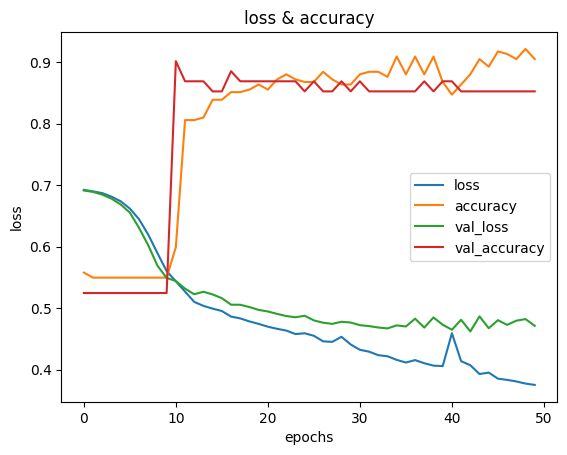

In [176]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("loss & accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend();
plt.show()

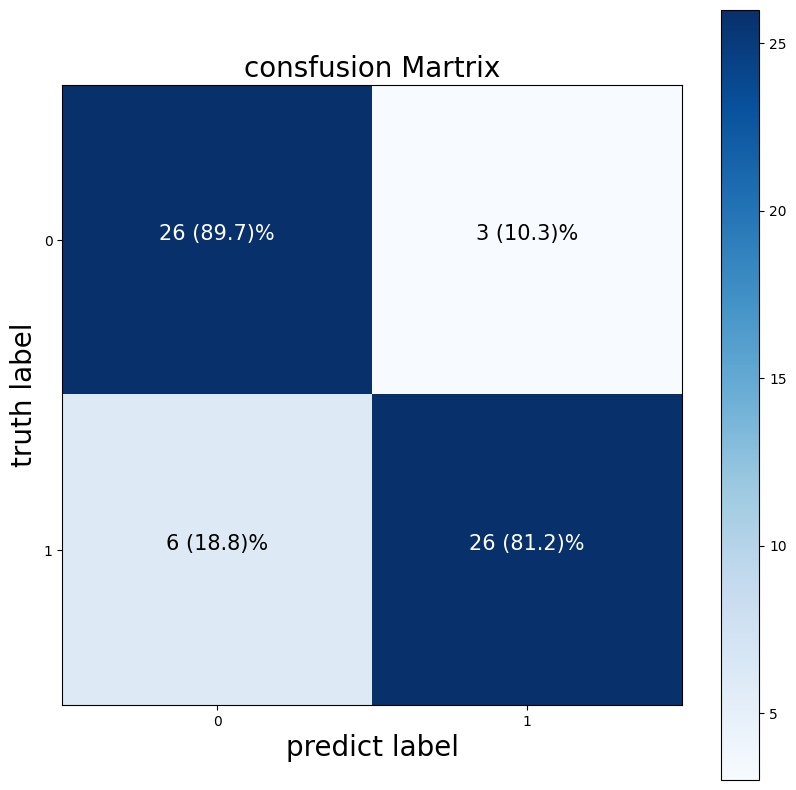

In [162]:
# Create and visualize the confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
figsize = (10,10)

#Create the confusion matrix

cm= confusion_matrix(y_test,tf.round(y_pred))
cm_norm  = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normzlize our confusion matrix
n_classes = cm.shape[0]

# Create a figure and a set of subplots

fig,ax = plt.subplots(figsize=figsize)

 # Create a matrix plot
cax= ax.matshow(cm,cmap=plt.cm.Blues)

fig.colorbar(cax)

# Create classes
classes =False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])


#label the axes
ax.set(title = "consfusion Martrix",
       xlabel="predict label",
       ylabel="truth label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#set label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for diffrent colors
threshold = (cm.max()+cm.min())/2.0


# Plot some text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
           horizontalalignment ="center",
           color="white" if cm[i,j] > threshold else "black",size=15)


In [166]:
# Save the model
model.save("heart.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
